In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px
import catboost as cat
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Data

In [2]:
url='https://raw.githubusercontent.com/jarif87/DataSets/main/credit_card.csv'
df=pd.read_csv(url)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.shape

(30000, 25)

In [6]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [7]:
df.rename(columns={'default.payment.next.month':'payment'},inplace=True)

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df["payment"].value_counts()

0    23364
1     6636
Name: payment, dtype: int64

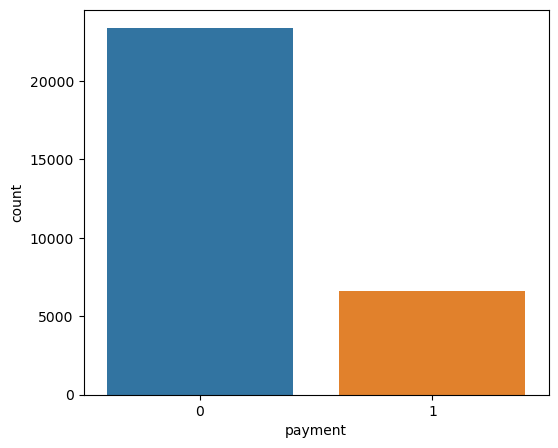

In [10]:
plt.figure(figsize=(6,5))
sns.countplot(x="payment",data=df)
plt.show()

In [11]:
train_data = df.drop(['ID','payment'], axis=1)
label_data=df["payment"]

# Wrapper Method

In [12]:
lr=LogisticRegression(max_iter=1000)

In [13]:
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(train_data,label_data)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=15)

In [14]:
feature = rfe.support_
rank= rfe.ranking_

In [15]:
for feature, rank in zip(train_data.columns,rank):
    print(f'Feature: {feature}, Rank: {rank}')

Feature: LIMIT_BAL, Rank: 5
Feature: SEX, Rank: 1
Feature: EDUCATION, Rank: 1
Feature: MARRIAGE, Rank: 1
Feature: AGE, Rank: 1
Feature: PAY_0, Rank: 1
Feature: PAY_2, Rank: 1
Feature: PAY_3, Rank: 1
Feature: PAY_4, Rank: 1
Feature: PAY_5, Rank: 1
Feature: PAY_6, Rank: 1
Feature: BILL_AMT1, Rank: 2
Feature: BILL_AMT2, Rank: 3
Feature: BILL_AMT3, Rank: 7
Feature: BILL_AMT4, Rank: 9
Feature: BILL_AMT5, Rank: 4
Feature: BILL_AMT6, Rank: 8
Feature: PAY_AMT1, Rank: 1
Feature: PAY_AMT2, Rank: 1
Feature: PAY_AMT3, Rank: 1
Feature: PAY_AMT4, Rank: 1
Feature: PAY_AMT5, Rank: 1
Feature: PAY_AMT6, Rank: 6


In [16]:
selected_feature_names = train_data.columns[rfe.support_].tolist()
print("Selected features:", selected_feature_names)

Selected features: ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']


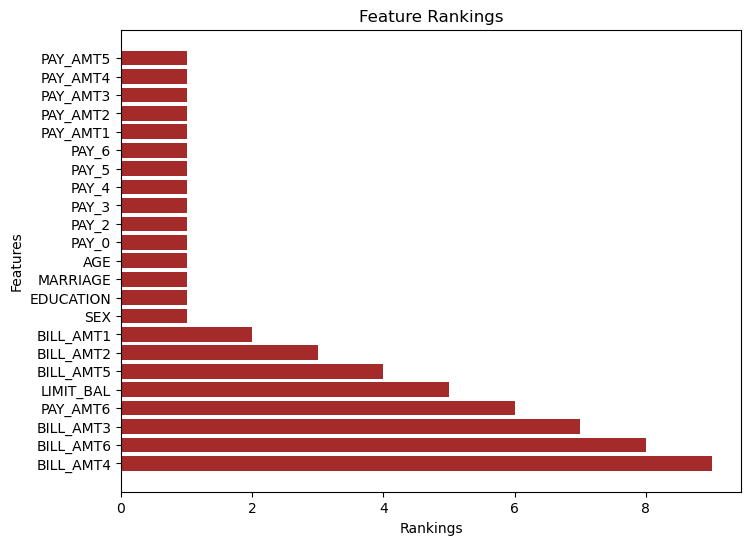

In [17]:
feature = rfe.support_
rank = rfe.ranking_
feature_names = train_data.columns
# Sort the features and rankings in descending order
sorted_indices = sorted(range(len(rank)), key=lambda k: rank[k], reverse=True)
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_rankings = list(rank[i] for i in sorted_indices)
plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_rankings,color="brown")
plt.xlabel('Rankings')
plt.ylabel('Features')
plt.title('Feature Rankings')
plt.show()

In [18]:

pre=rfe.predict(train_data)
accuracy = accuracy_score(label_data,pre)
print("Accuracy score:", accuracy)

Accuracy score: 0.808


# Confusion Matrix

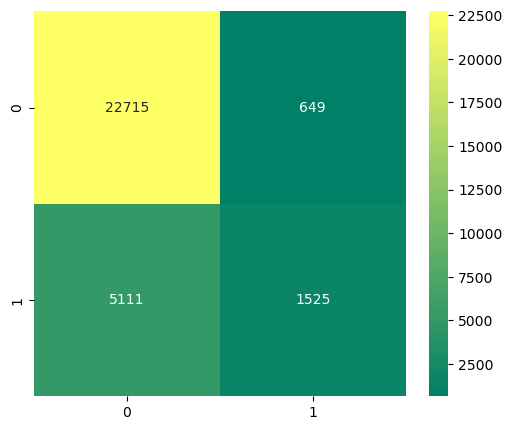

In [19]:
plt.figure(figsize=(6,5))
cf_matrix=confusion_matrix(label_data,pre)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="summer")
plt.show()

In [20]:
print(classification_report(label_data,pre))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     23364
           1       0.70      0.23      0.35      6636

    accuracy                           0.81     30000
   macro avg       0.76      0.60      0.62     30000
weighted avg       0.79      0.81      0.77     30000



# Embedded Methods - L2 regularization (Ridge)

In [21]:
lr0=LogisticRegression(penalty='l2', solver='liblinear')
lr0.fit(train_data,label_data)

LogisticRegression(solver='liblinear')

In [22]:
coefficients =lr0.coef_

In [23]:

for feature, coefficient in zip(train_data.columns, coefficients[0]):
    print(f'Feature: {feature}, Coefficient: {coefficient}')

Feature: LIMIT_BAL, Coefficient: -3.581029613300624e-06
Feature: SEX, Coefficient: -0.0008868359227788642
Feature: EDUCATION, Coefficient: -0.001026778302206237
Feature: MARRIAGE, Coefficient: -0.0009588413474591202
Feature: AGE, Coefficient: -0.012773852947867117
Feature: PAY_0, Coefficient: 0.0016670406433717385
Feature: PAY_2, Coefficient: 0.0012985723981827186
Feature: PAY_3, Coefficient: 0.001139437332852629
Feature: PAY_4, Coefficient: 0.0010549390392369754
Feature: PAY_5, Coefficient: 0.0009755857311976279
Feature: PAY_6, Coefficient: 0.0009038697119288902
Feature: BILL_AMT1, Coefficient: -9.0003626199329e-06
Feature: BILL_AMT2, Coefficient: 5.459621394365457e-06
Feature: BILL_AMT3, Coefficient: 2.036614424109074e-06
Feature: BILL_AMT4, Coefficient: 7.310187291355028e-07
Feature: BILL_AMT5, Coefficient: 3.249243068489978e-06
Feature: BILL_AMT6, Coefficient: 1.9676354406904066e-06
Feature: PAY_AMT1, Coefficient: -3.098440759244997e-05
Feature: PAY_AMT2, Coefficient: -2.1087159552

In [24]:
col_names=train_data.columns
lm_coef = lr0.coef_
df0 = list(zip(col_names, lm_coef[0]))
df0 = pd.DataFrame(df0, columns=['Features', 'Coefficient'])
df0

,Features,Coefficient
0,LIMIT_BAL,-3.581030e-06
1,SEX,-8.868359e-04
2,EDUCATION,-1.026778e-03
3,MARRIAGE,-9.588413e-04
4,AGE,-1.277385e-02
5,PAY_0,1.667041e-03
6,PAY_2,1.298572e-03
7,PAY_3,1.139437e-03
8,PAY_4,1.054939e-03
9,PAY_5,9.755857e-04


# Plot the coefficients

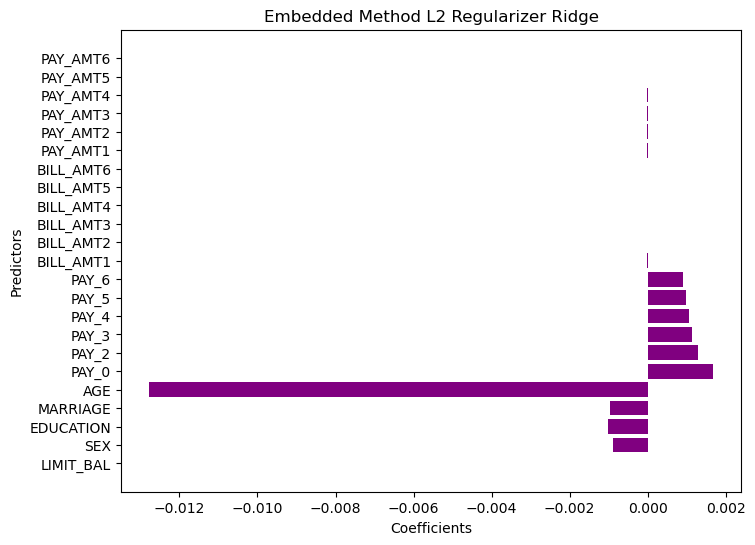

In [25]:
plt.figure(figsize = (8,6))
coef_plot = pd.Series(lm_coef[0], index = col_names)
plt.barh(coef_plot.index, coef_plot.values,color="purple")

plt.title('Embedded Method L2 Regularizer Ridge')
plt.xlabel('Coefficients')
plt.ylabel('Predictors')

plt.show()

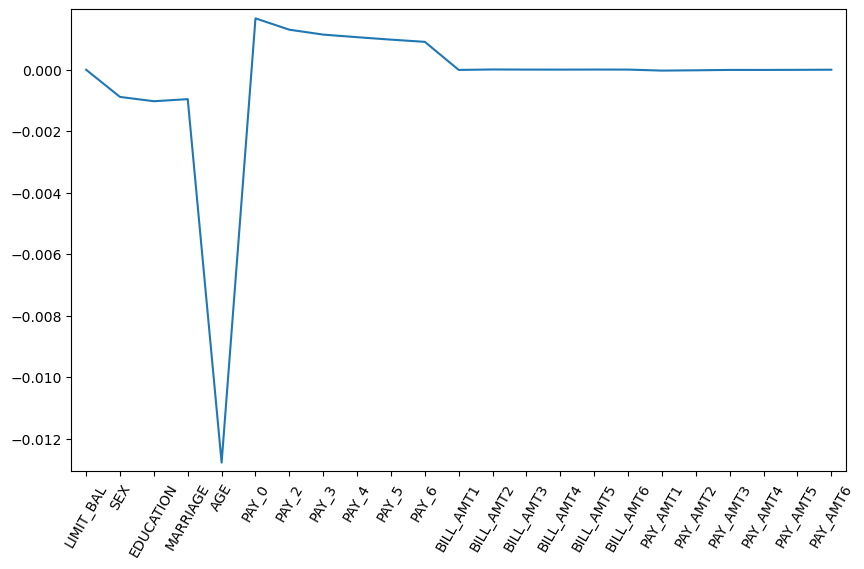

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(len(col_names)), lm_coef[0])
plt.xticks(range(len(col_names)), col_names.values, rotation=60) 
plt.margins(0.02)
plt.show()

# Filter Methods

In [27]:
ex_tree=ExtraTreesClassifier()
ex_tree.fit(train_data,label_data)

ExtraTreesClassifier()

# Important Feature

In [28]:
feature_importance = ex_tree.feature_importances_
feature_importance 

array([0.0651627 , 0.01206252, 0.0325482 , 0.02254952, 0.06631333,
       0.09347593, 0.05502217, 0.03097445, 0.02851118, 0.03371011,
       0.02695087, 0.05023031, 0.04646057, 0.04550574, 0.04425214,
       0.04357954, 0.0443489 , 0.04396706, 0.04270693, 0.04194583,
       0.04091676, 0.0425961 , 0.04620914])

In [29]:
feature_names=train_data.columns
feature_names

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

# Feature Importances DataFrame

In [30]:
df_filter = pd.DataFrame({'Feature': train_data.columns, 'Score': feature_importance})
df_filter

,Feature,Score
0,LIMIT_BAL,0.065163
1,SEX,0.012063
2,EDUCATION,0.032548
3,MARRIAGE,0.022550
4,AGE,0.066313
5,PAY_0,0.093476
6,PAY_2,0.055022
7,PAY_3,0.030974
8,PAY_4,0.028511
9,PAY_5,0.033710


In [31]:
# df_filter = df_filter.sort_values(by='Score', ascending=True)
# df_filter

# Large 15

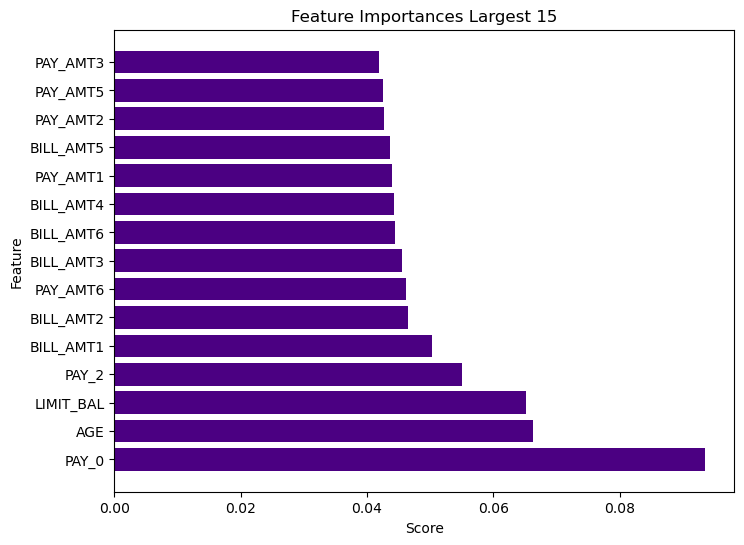

In [32]:
df_large=df_filter.nlargest(15,'Score')
df_large_sort=df_large.sort_values(by="Score",ascending=False)
plt.figure(figsize=(8, 6))
plt.barh(df_large_sort['Feature'], df_large_sort['Score'],color="indigo")
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importances Largest 15')
plt.show()


#  Small 15

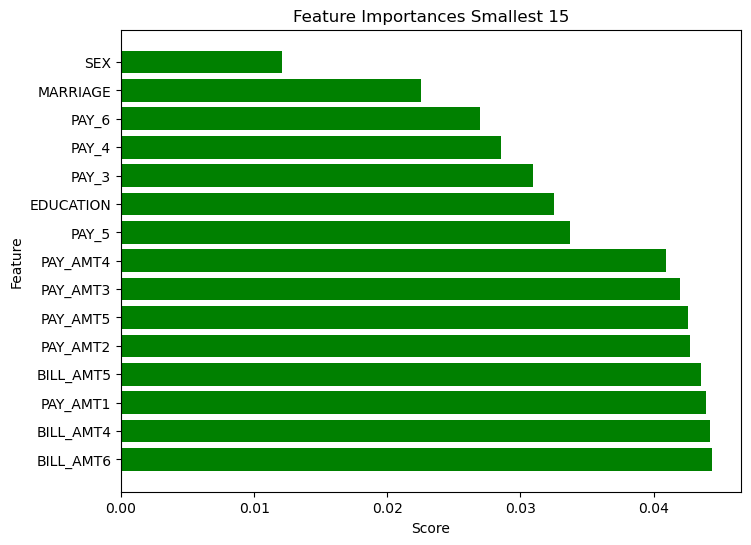

In [33]:
df_small=df_filter.nsmallest(15,'Score')
df_small_sort=df_small.sort_values(by="Score",ascending=False)
plt.figure(figsize=(8, 6))
plt.barh(df_small_sort['Feature'], df_small_sort['Score'],color="green")
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importances Smallest 15')
plt.show()

# Feature Importances

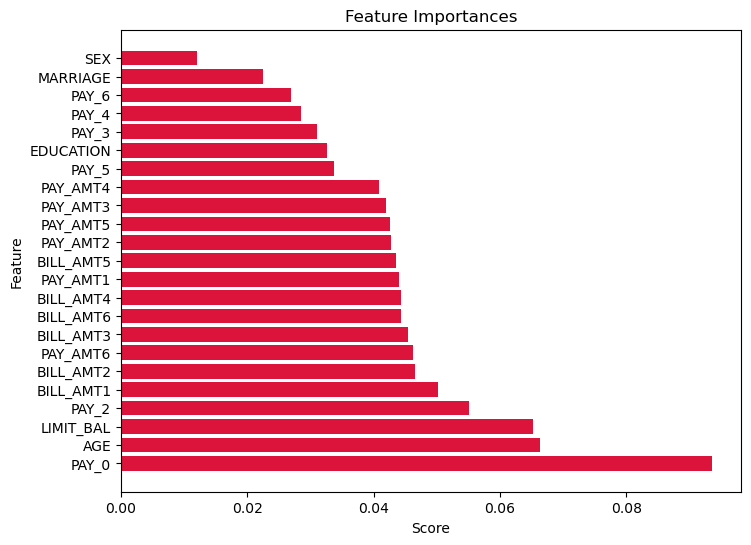

In [34]:
df_sorted = df_filter.sort_values(by='Score', ascending=False)
plt.figure(figsize=(8, 6))
plt.barh(df_sorted['Feature'], df_sorted['Score'],color="crimson")
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [35]:
train_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


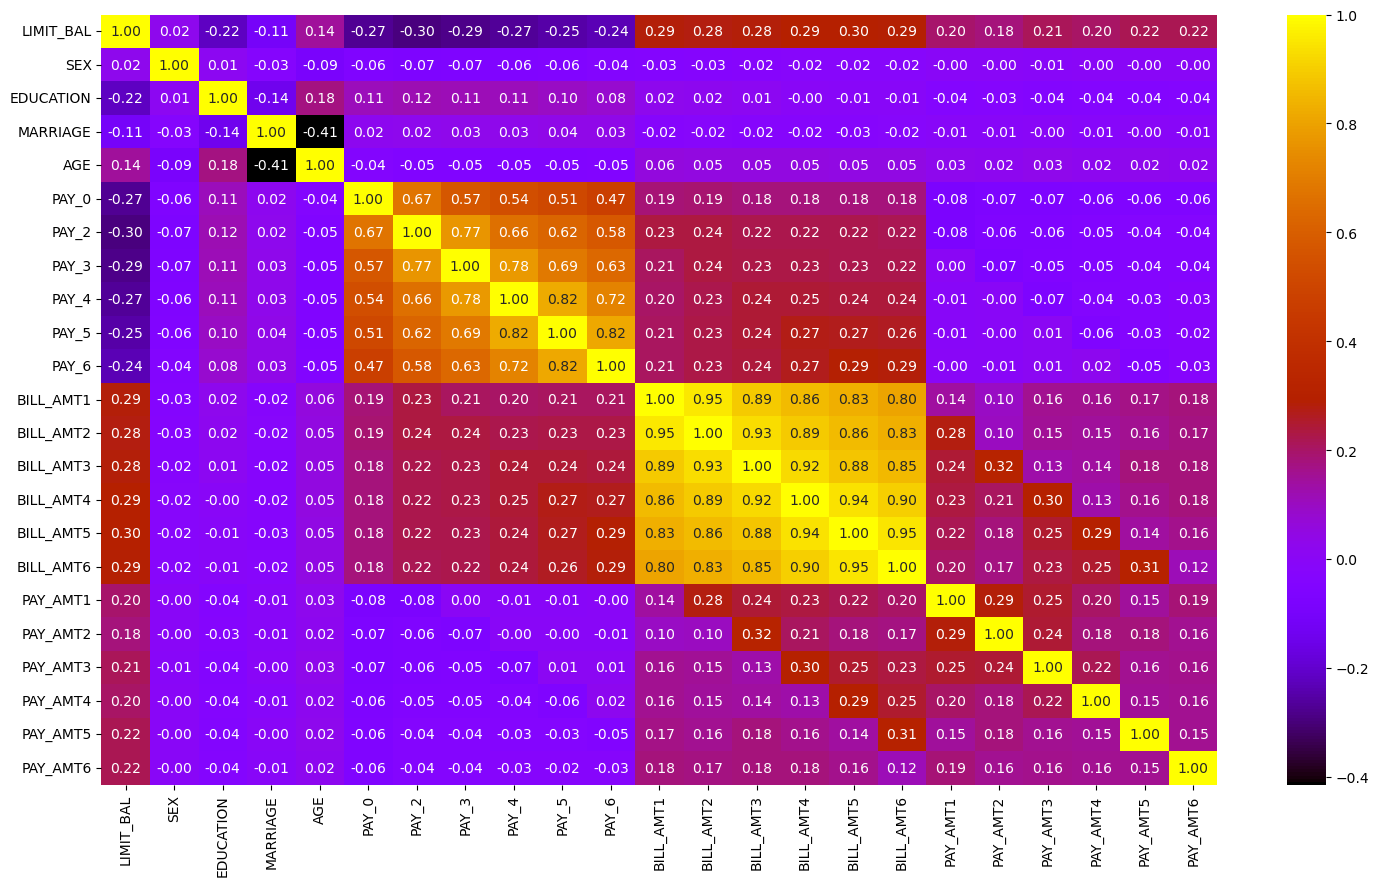

In [36]:
cor=train_data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(cor,annot=True,fmt=".2f",cmap="gnuplot")
plt.show()

# Select K Best


In [37]:
df2=df.copy()
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [38]:
x = df2.drop(['ID','payment'],axis=1)
y = df2['payment']

In [39]:
model2 = SelectKBest(score_func=f_classif)
model2.fit(x,y)

SelectKBest()

In [40]:
feature_scores = model2.scores_
feature_scores

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [41]:
feature_names=x.columns
for feature, score in zip(feature_names, feature_scores):
    print(f"Feature: {feature}, Score: {score}")

Feature: LIMIT_BAL, Score: 724.0685392611682
Feature: SEX, Score: 47.97885434761171
Feature: EDUCATION, Score: 23.54711184062515
Feature: MARRIAGE, Score: 17.781271386920597
Feature: AGE, Score: 5.788555824708498
Feature: PAY_0, Score: 3537.714969626687
Feature: PAY_2, Score: 2239.1691358465864
Feature: PAY_3, Score: 1757.466444026491
Feature: PAY_4, Score: 1476.8459673526688
Feature: PAY_5, Score: 1304.5911757099227
Feature: PAY_6, Score: 1085.4024851202532
Feature: BILL_AMT1, Score: 11.580531516293314
Feature: BILL_AMT2, Score: 6.044237892359451
Feature: BILL_AMT3, Score: 5.944387708457432
Feature: BILL_AMT4, Score: 3.094745184781883
Feature: BILL_AMT5, Score: 1.3710873966307768
Feature: BILL_AMT6, Score: 0.8658202918867746
Feature: PAY_AMT1, Score: 160.4038095819619
Feature: PAY_AMT2, Score: 103.2915242543617
Feature: PAY_AMT3, Score: 95.21801088949987
Feature: PAY_AMT4, Score: 97.18800046896295
Feature: PAY_AMT5, Score: 91.42980080214166
Feature: PAY_AMT6, Score: 85.08904532729818


In [42]:
df_kbest = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
df_kbest

,Feature,Score
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


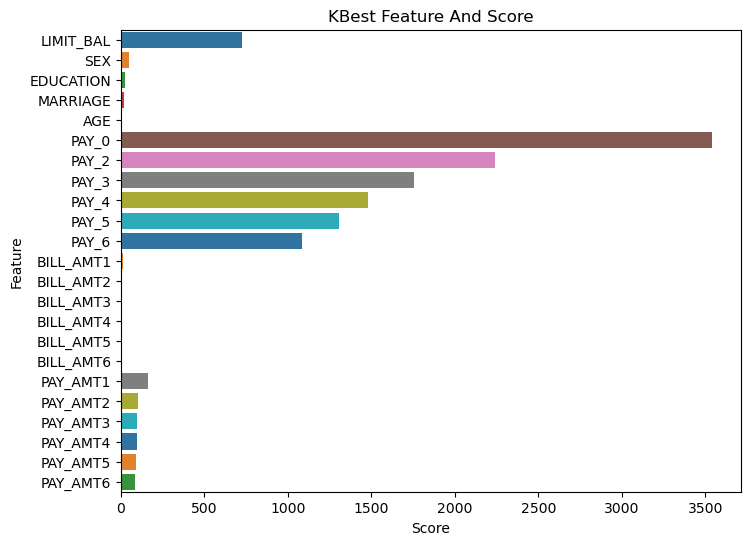

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_kbest, y="Feature", x="Score",palette="tab10")
plt.title("KBest Feature And Score")
plt.show()

# KBest Large

In [44]:
kbest_large=df_kbest.nlargest(18,'Score')
kbest_large

,Feature,Score
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176
10,PAY_6,1085.402485
0,LIMIT_BAL,724.068539
17,PAY_AMT1,160.403810
18,PAY_AMT2,103.291524
20,PAY_AMT4,97.188000


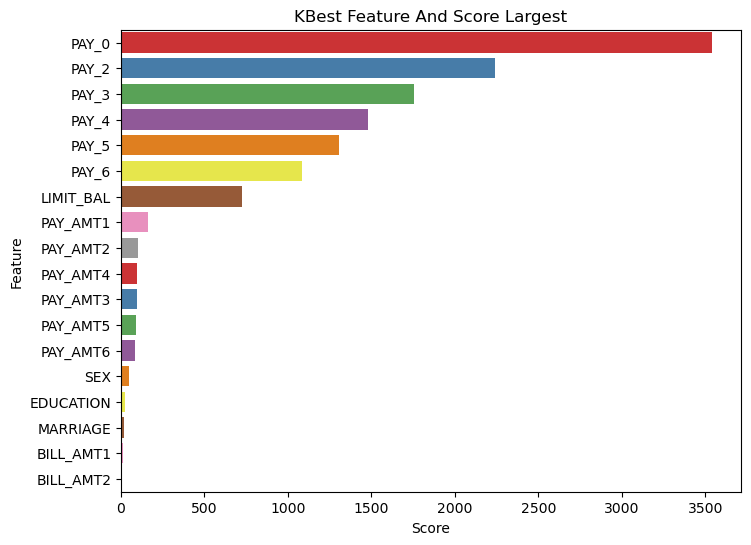

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(data=kbest_large, y="Feature", x="Score",palette="Set1")
plt.title("KBest Feature And Score Largest")
plt.show()

# KBest Small

In [46]:
kbest_small=df_kbest.nsmallest(18,'Score')
kbest_small

,Feature,Score
16,BILL_AMT6,0.865820
15,BILL_AMT5,1.371087
14,BILL_AMT4,3.094745
4,AGE,5.788556
13,BILL_AMT3,5.944388
12,BILL_AMT2,6.044238
11,BILL_AMT1,11.580532
3,MARRIAGE,17.781271
2,EDUCATION,23.547112
1,SEX,47.978854


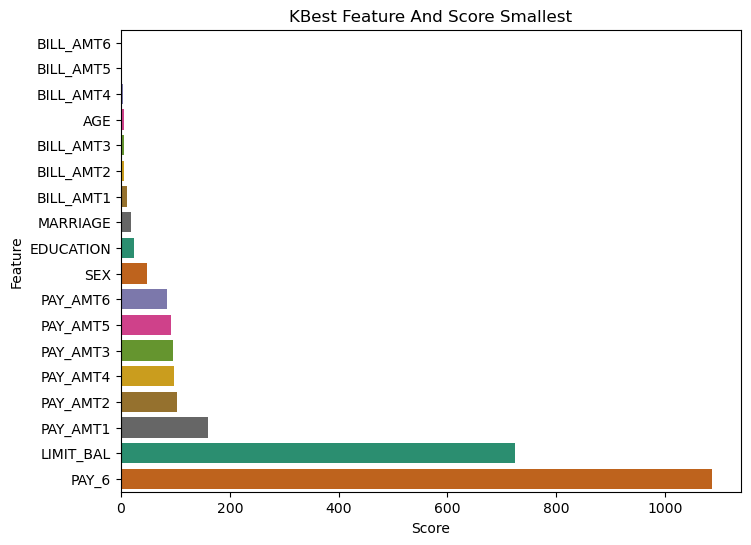

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(data=kbest_small, y="Feature", x="Score",palette="Dark2")
plt.title("KBest Feature And Score Smallest")
plt.show()

# Principal Component Analysis (PCA)

In [48]:
df4=df.copy()
df4.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [49]:
new_data=df4.drop(['ID','payment'],axis=1)
new_label=df4["payment"]

In [50]:
min_max = MinMaxScaler()
scale_data=min_max.fit_transform(new_data)
scale_data

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.00161031, 0.        ,
        0.00378311],
       [0.08080808, 1.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.07070707, 0.        , 0.5       , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.04040404, 0.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00189155]])

In [51]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scale_data)

In [52]:
pca_data

array([[-0.40423245, -0.00800476, -0.00259672, -0.21256556, -0.21185793],
       [-0.39188881,  0.209224  , -0.19698759, -0.06389018, -0.00902002],
       [-0.39264215,  0.08409527, -0.12656657, -0.07712257,  0.08073339],
       ...,
       [ 0.62351265,  0.33728837, -0.08489178, -0.13943672,  0.06227164],
       [ 0.60374479, -0.01953155,  0.214211  , -0.1519824 ,  0.02938485],
       [ 0.60917214,  0.0099741 ,  0.23321988, -0.1122444 , -0.0228411 ]])

In [53]:
df5= pd.DataFrame(pca_data, columns=["A","B","C","D","E"])
df5

,A,B,C,D,E
0,-0.404232,-0.008005,-0.002597,-0.212566,-0.211858
1,-0.391889,0.209224,-0.196988,-0.063890,-0.009020
2,-0.392642,0.084095,-0.126567,-0.077123,0.080733
3,-0.394038,0.068885,0.154030,-0.108658,-0.085688
4,0.610813,-0.089679,0.334445,-0.141113,0.074264
...,...,...,...,...,...
29995,0.605245,0.027127,0.231678,0.043588,0.043467
29996,0.601275,-0.132858,-0.028314,-0.126576,0.241788
29997,0.623513,0.337288,-0.084892,-0.139437,0.062272
29998,0.603745,-0.019532,0.214211,-0.151982,0.029385


In [54]:

fig = px.scatter_3d(df5, x='A', y='B', z='C', color='A')

fig.update_layout(scene=dict(xaxis_title='A', yaxis_title='B', zaxis_title='C'),
                  title={'text': '3D Scatter Plot', 'x': 0.5, 'xanchor': 'center', 'y': 0.9},
                  width=900,  
                  height=700)

fig.show()


In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(pca_data,new_label,test_size=0.3,random_state=42)

# CatBoostClassifier

In [56]:
cat_model=cat.CatBoostClassifier(iterations=500,loss_function='Logloss', eval_metric='Accuracy',random_state=42)
cat_model.fit(X_train,Y_train,eval_set=(X_test,Y_test))

Learning rate set to 0.090875
0:	learn: 0.8050952	test: 0.8027778	best: 0.8027778 (0)	total: 55.5ms	remaining: 27.7s
1:	learn: 0.8050000	test: 0.8024444	best: 0.8027778 (0)	total: 62.9ms	remaining: 15.7s
2:	learn: 0.8047143	test: 0.8025556	best: 0.8027778 (0)	total: 73.5ms	remaining: 12.2s
3:	learn: 0.8047619	test: 0.8027778	best: 0.8027778 (0)	total: 80.9ms	remaining: 10s
4:	learn: 0.8057143	test: 0.8034444	best: 0.8034444 (4)	total: 87.4ms	remaining: 8.66s
5:	learn: 0.8053333	test: 0.8033333	best: 0.8034444 (4)	total: 94.6ms	remaining: 7.79s
6:	learn: 0.8058095	test: 0.8034444	best: 0.8034444 (4)	total: 103ms	remaining: 7.24s
7:	learn: 0.8056667	test: 0.8038889	best: 0.8038889 (7)	total: 111ms	remaining: 6.8s
8:	learn: 0.8061429	test: 0.8032222	best: 0.8038889 (7)	total: 120ms	remaining: 6.54s
9:	learn: 0.8065238	test: 0.8037778	best: 0.8038889 (7)	total: 129ms	remaining: 6.31s
10:	learn: 0.8067143	test: 0.8047778	best: 0.8047778 (10)	total: 138ms	remaining: 6.12s
11:	learn: 0.806714

# Accuracy Score

In [57]:
pred=cat_model.predict(X_test)
accuracy=accuracy_score(Y_test,pred)
print("Accuracy Score",accuracy)

Accuracy Score 0.8053333333333333


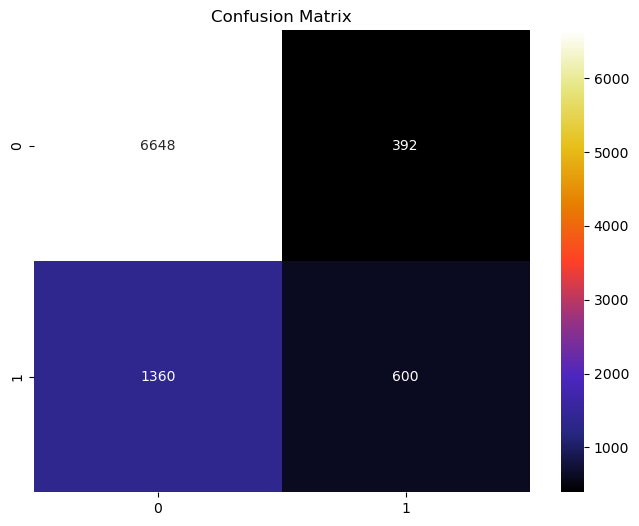

In [58]:
plt.figure(figsize=(8,6))
cf=confusion_matrix(Y_test,pred)
sns.heatmap(cf,annot=True,fmt="d",cmap="CMRmap")
plt.title("Confusion Matrix")
plt.show()

In [59]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7040
           1       0.60      0.31      0.41      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



# Before PCA

In [60]:
xtrain,xtest, ytrain,ytest=train_test_split(new_data,new_label,test_size=0.3,random_state=42)

In [61]:
new_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [62]:
new_label

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: payment, Length: 30000, dtype: int64

# CatBoost Classifier

In [63]:
cat_model=cat.CatBoostClassifier(iterations=500,loss_function='Logloss', eval_metric='Accuracy',random_state=42)
cat_model.fit(xtrain,ytrain,eval_set=(xtest,ytest))

Learning rate set to 0.090875
0:	learn: 0.8204762	test: 0.8201111	best: 0.8201111 (0)	total: 11.8ms	remaining: 5.89s
1:	learn: 0.8210000	test: 0.8205556	best: 0.8205556 (1)	total: 22.5ms	remaining: 5.61s
2:	learn: 0.8202857	test: 0.8204444	best: 0.8205556 (1)	total: 34.2ms	remaining: 5.66s
3:	learn: 0.8199524	test: 0.8202222	best: 0.8205556 (1)	total: 43.2ms	remaining: 5.36s
4:	learn: 0.8205714	test: 0.8203333	best: 0.8205556 (1)	total: 54.7ms	remaining: 5.41s
5:	learn: 0.8206190	test: 0.8200000	best: 0.8205556 (1)	total: 64.4ms	remaining: 5.3s
6:	learn: 0.8206190	test: 0.8206667	best: 0.8206667 (6)	total: 76ms	remaining: 5.35s
7:	learn: 0.8208095	test: 0.8205556	best: 0.8206667 (6)	total: 86.7ms	remaining: 5.33s
8:	learn: 0.8212857	test: 0.8206667	best: 0.8206667 (6)	total: 97.6ms	remaining: 5.32s
9:	learn: 0.8220476	test: 0.8204444	best: 0.8206667 (6)	total: 107ms	remaining: 5.26s
10:	learn: 0.8223333	test: 0.8214444	best: 0.8214444 (10)	total: 117ms	remaining: 5.18s
11:	learn: 0.822

# Accuracy Score

In [64]:
pred0=cat_model.predict(xtest)
accuracy0=accuracy_score(ytest,pred0)
print("Accuracy Score",accuracy0)

Accuracy Score 0.8224444444444444


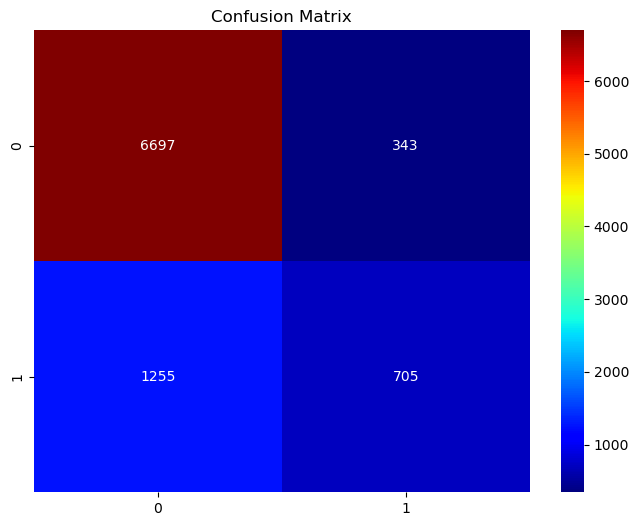

In [65]:
plt.figure(figsize=(8,6))
cf0=confusion_matrix(ytest,pred0)
sns.heatmap(cf0,annot=True,fmt="d",cmap="jet")
plt.title("Confusion Matrix")
plt.show()

In [66]:
print(classification_report(ytest,pred0))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



# References

* https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

* https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

* https://sebastianraschka.com/faq/docs/feature_sele_categories.html